# Marketing campaigns of a Portuguese banking institution Dataset 

The goal of this dataset is to train a model so that it predicts whether their customers will likely to subscribe bank term deposit. However, in this exercise/project. we are simply going to observe and analyse the distrubtion of the data,search for outlier and missing values and asses the relationship between features.

In [2]:
# To Load the python libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# To load the dataset into jupyter notebook
bank=pd.read_csv("C:/Users/Dell/Documents/Deji Folder/Workplace/bank-full.csv", sep=";")

In [4]:
# to load the first 5 set of the data
bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [5]:
bank.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

In [6]:
# to know the information about the dataset
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:

print("shape of heart dataset",bank.shape)
print(f" The number of sample present in the data is {bank.shape[0]} and the feature of the data is {bank.shape[1]}")

shape of heart dataset (45211, 17)
 The number of sample present in the data is 45211 and the feature of the data is 17


In [8]:
# to check for missing values


In [9]:
# to check for missing value
bank.duplicated().any()

False

In [10]:
bank.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

 ## Introduction of data:
I will be using data of bank here. The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.
 
 
- Input variables:
    bank client data:
1. - age (numeric)
2. - job : type of job (categorical:"admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
3. - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4. - education (categorical: "unknown","secondary","primary","tertiary")
5. - default: has credit in default? (binary: "yes","no")
6. - balance: average yearly balance, in euros (numeric) 
7. - housing: has housing loan? (binary: "yes","no")
8. - loan: has personal loan? (binary: "yes","no")
    related with the last contact of the current campaign:
9. - contact: contact communication type (categorical: "unknown","telephone","cellular") 
10. - day: last contact day of the month (numeric)
11. - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
12. - duration: last contact duration, in seconds (numeric) other attributes:
13. - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
15. - previous: number of contacts performed before this campaign and for this client (numeric)
16. - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  ### Output variable (desired target):
17. - y - has the client subscribed a term deposit? (binary: "yes","no")

# Data Visualization:


## Univarite Analysis

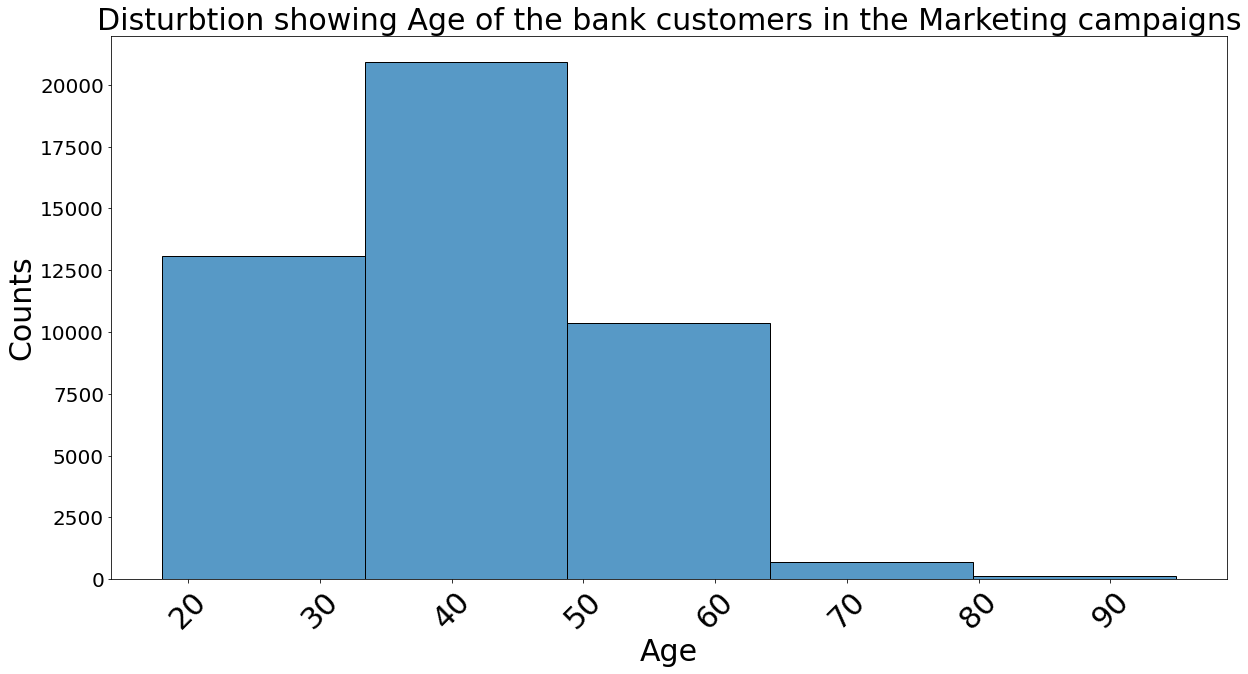

In [11]:
plt.figure(figsize=(20,10))
sns.histplot(bank['age'],bins=5)
plt.title("Disturbtion showing Age of the bank customers in the Marketing campaigns",size=30)
plt.xticks(rotation=45,size=30)
plt.xlabel("Age",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=20)
plt.show()

In this graphs, it show people of age range of 35-50 patrol the bank more.


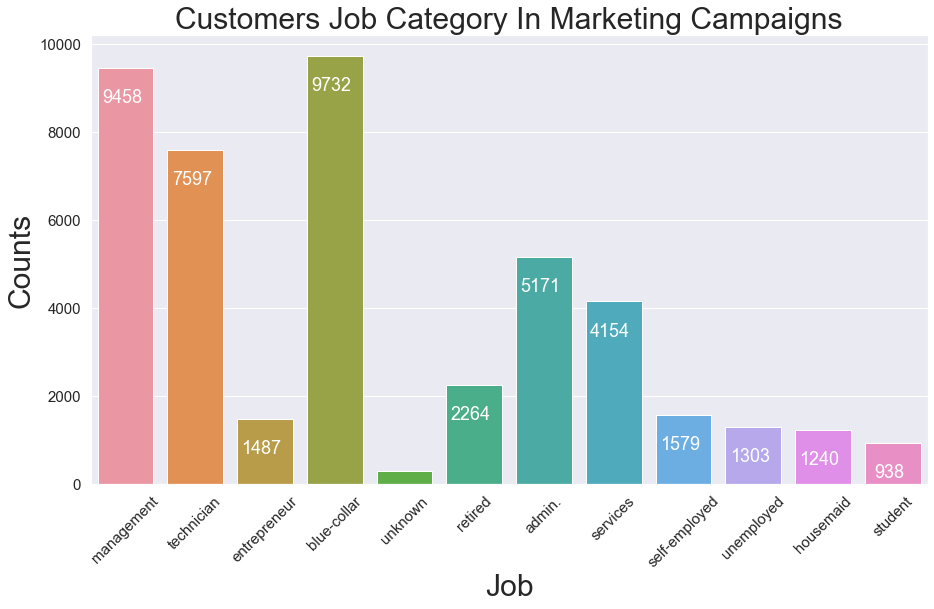

In [12]:
#Uniuvariate Analysis

# Analyze the vocation of the customers for insight 
sns.set(rc={'figure.figsize':(15,8.27)})

ax = sns.countplot(x='job', data = bank)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)

plt.title("Customers Job Category In Marketing Campaigns",size=30)
plt.xticks(rotation=45,size=15)
plt.xlabel("Job",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=15)
plt.show()


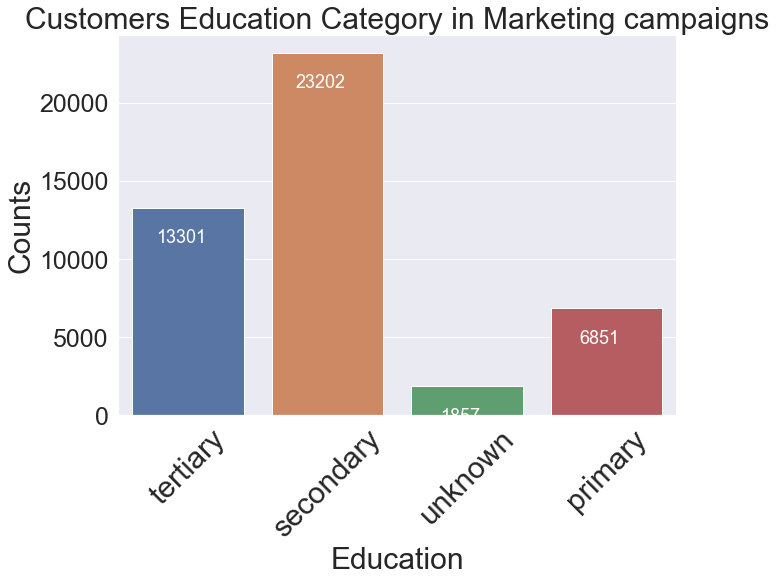

In [13]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='education', data=bank)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)

plt.title("Customers Education Category in Marketing campaigns",size=30)
plt.xticks(rotation=45,size=30)
plt.xlabel("Education",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=25)
plt.show()


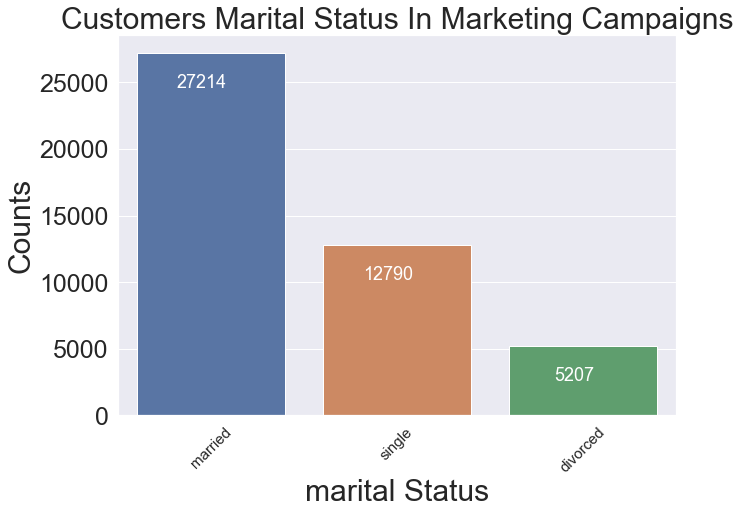

In [14]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='marital', data=bank)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)

plt.title("Customers Marital Status In Marketing Campaigns",size=30)
plt.xticks(rotation=45,size=15)
plt.xlabel("marital Status",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=25)
plt.show()


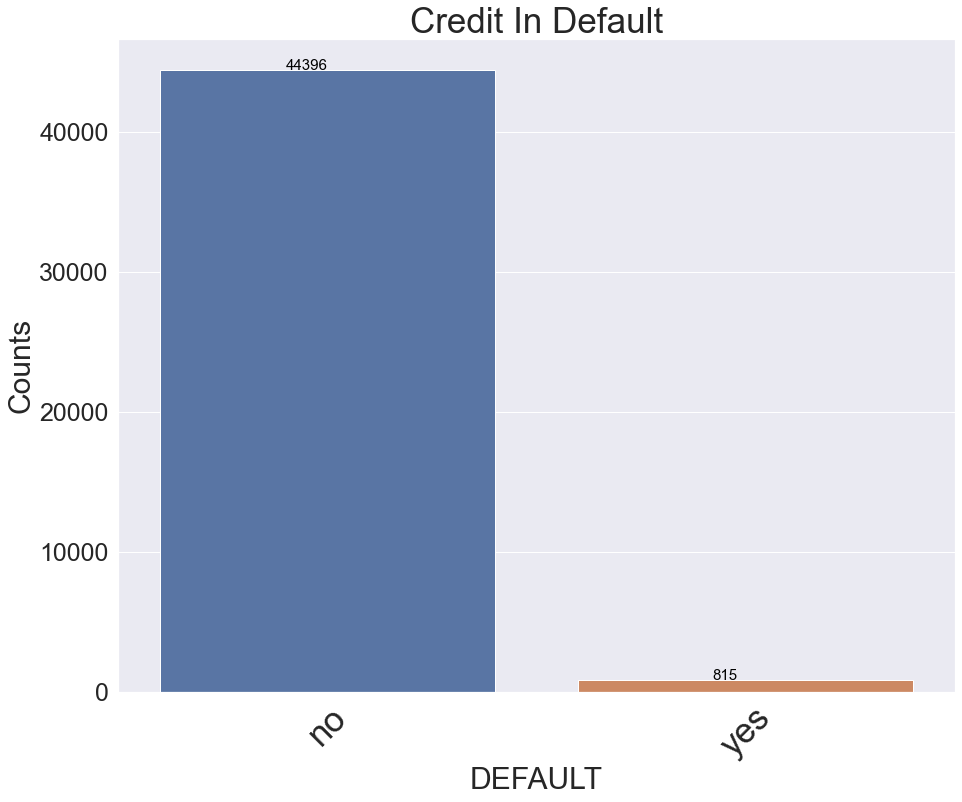

In [15]:
plt.figure(figsize=(15,12))
ax=sns.countplot(x='default', data=bank)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='baseline', color='black', size=15)

plt.title("Credit In Default",size=35)
plt.xticks(rotation=45,size=35)
plt.xlabel("DEFAULT",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=25)
plt.show()


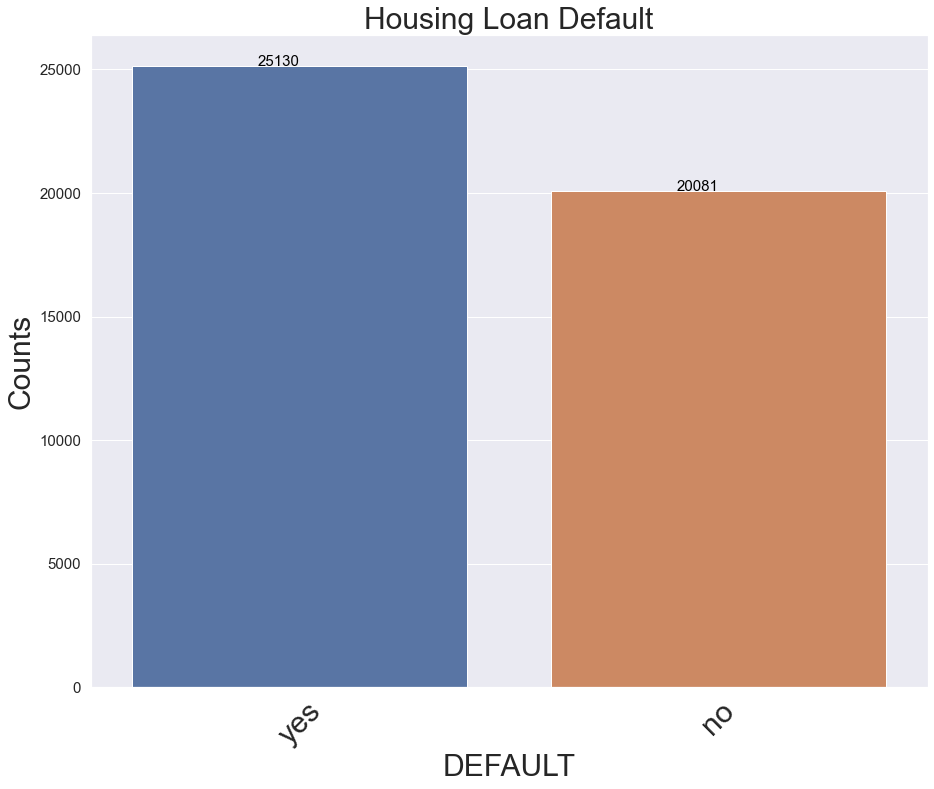

In [16]:
plt.figure(figsize=(15,12))
ax=sns.countplot(x='housing', data=bank)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='baseline', color='black', size=15)

plt.title("Housing Loan Default",size=30)
plt.xticks(rotation=45,size=30)
plt.xlabel("DEFAULT",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=15)
plt.show()


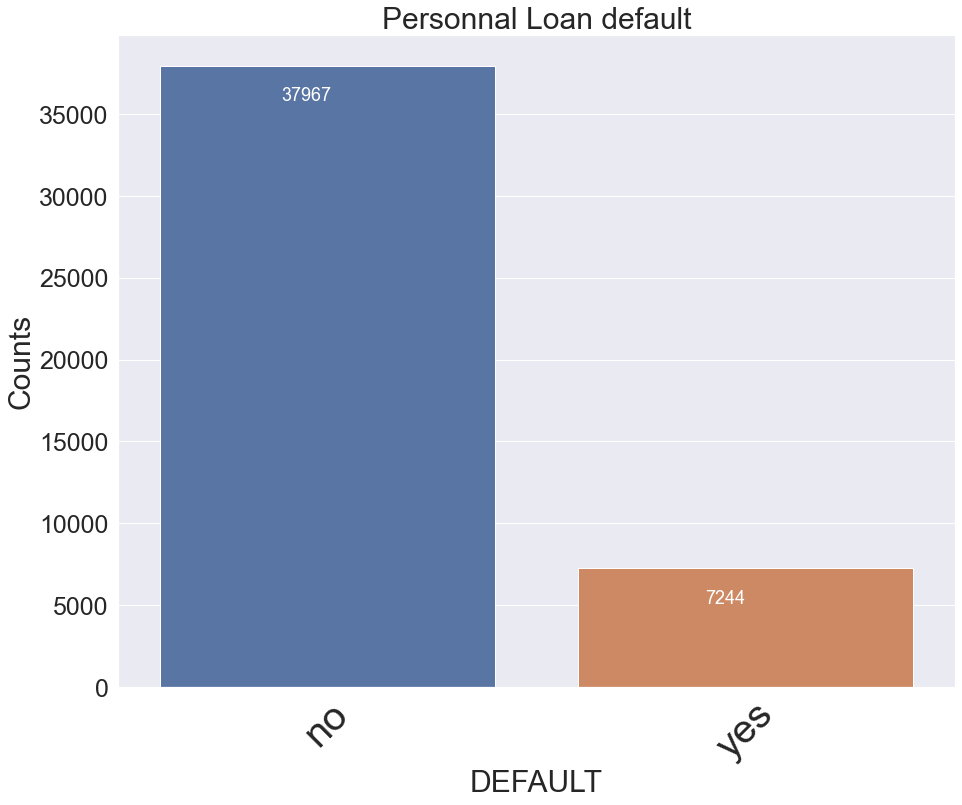

In [17]:
plt.figure(figsize=(15,12))
ax=sns.countplot(x='loan', data=bank)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)


plt.title("Personnal Loan default",size=30)
plt.xticks(rotation=45,size=40)
plt.xlabel("DEFAULT",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=25)
plt.show()

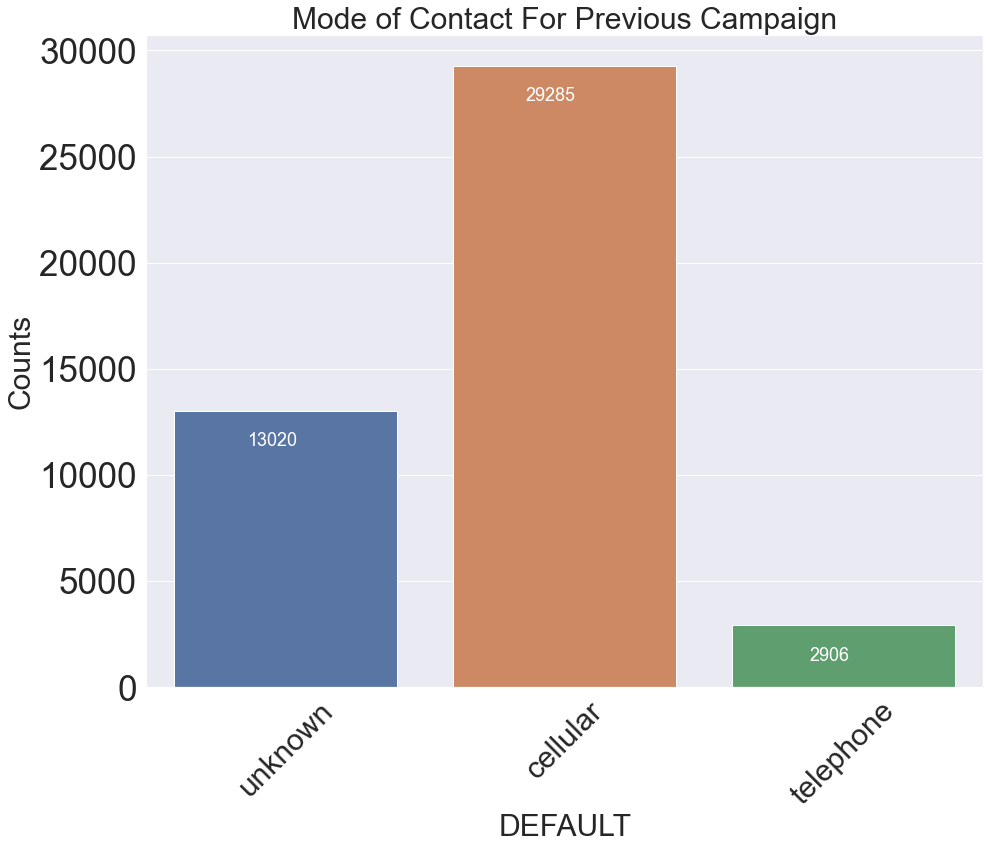

In [18]:
plt.figure(figsize=(15,12))
ax=sns.countplot(x='contact', data=bank)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)


plt.title("Mode of Contact For Previous Campaign",size=30)
plt.xticks(rotation=45,size=30)
plt.xlabel("DEFAULT",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=35)
plt.show()

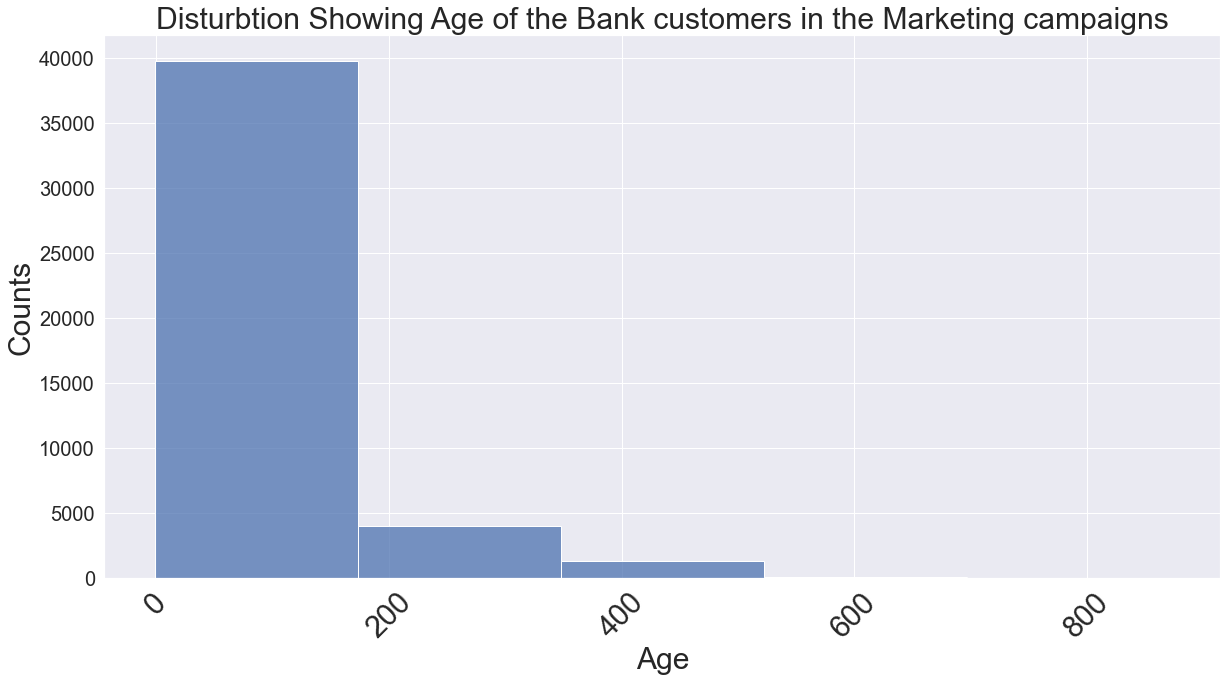

In [19]:
plt.figure(figsize=(20,10))
sns.histplot(bank['pdays'],bins=5)
plt.title("Disturbtion Showing Age of the Bank customers in the Marketing campaigns",size=30)
plt.xticks(rotation=45,size=30)
plt.xlabel("Age",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=20)
plt.show()

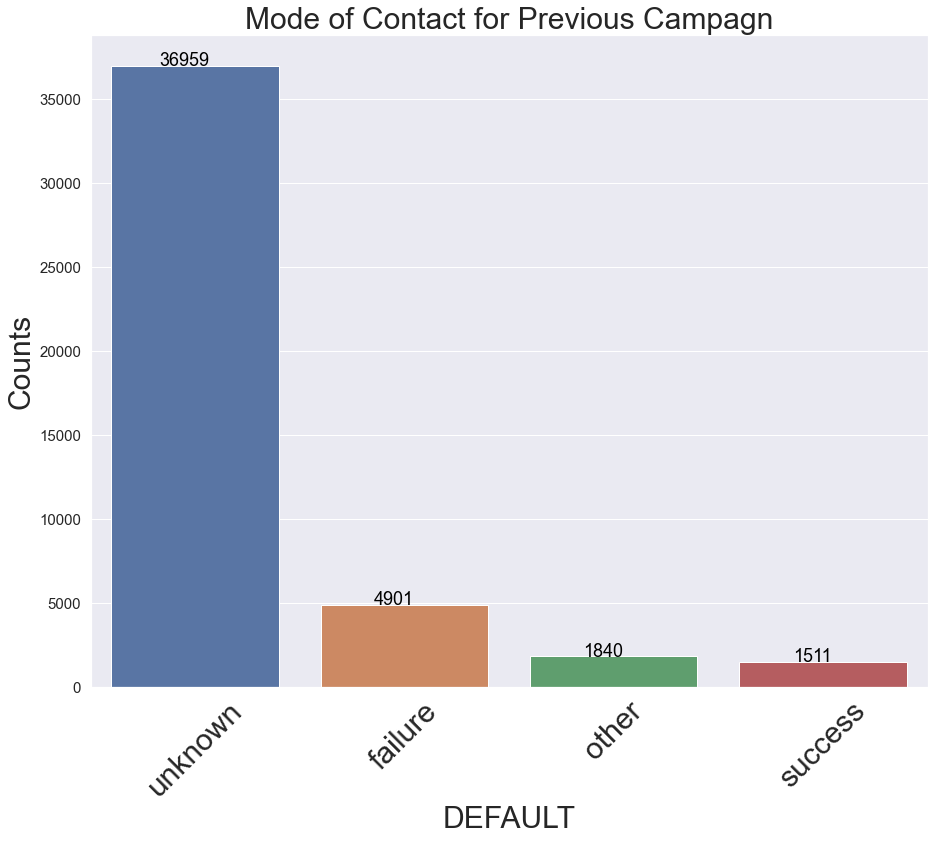

In [20]:
plt.figure(figsize=(15,12))
ax=sns.countplot(x='poutcome', data=bank)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='baseline', color='black', size=18)


plt.title("Mode of Contact for Previous Campagn",size=30)
plt.xticks(rotation=45,size=30)
plt.xlabel("DEFAULT",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=15)
plt.show()

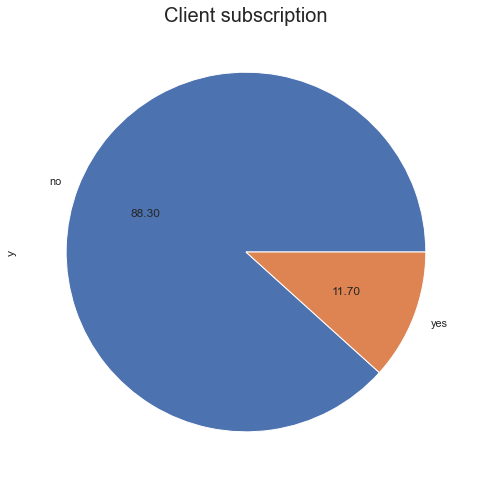

In [21]:
bank["y"].value_counts().plot.pie(autopct="%.2f")
plt.title("Client subscription", size= 20)
plt.show()

### Bivariate

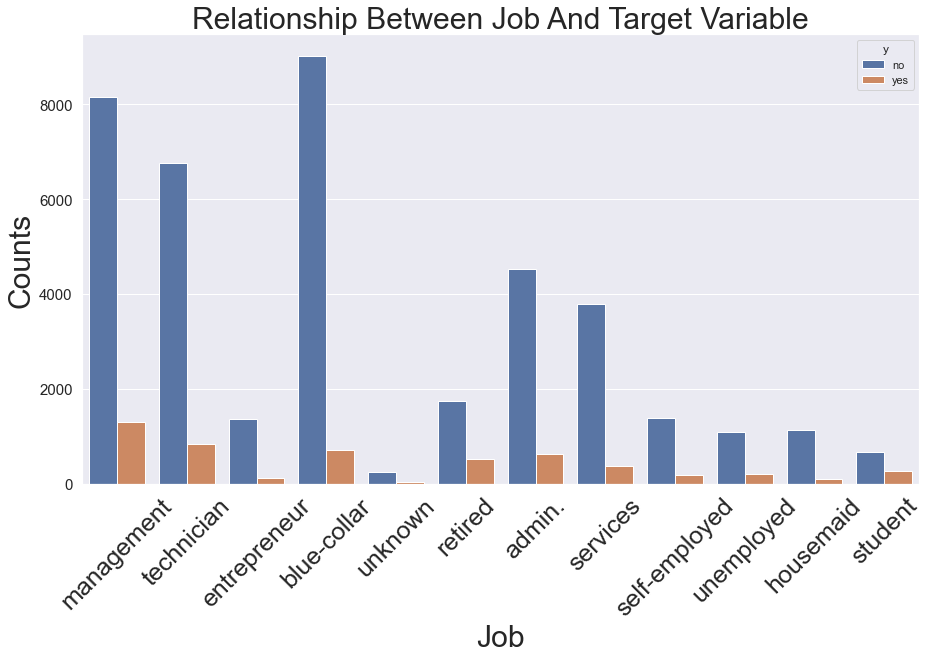

In [22]:
#Uniuvariate Analysis

# Analyze the vocation of the customers for insight 
sns.set(rc={'figure.figsize':(15,8.27)})

sns.countplot(x='job',hue="y" ,data = bank)

plt.title("Relationship Between Job And Target Variable",size=30)
plt.xticks(rotation=45,size=25)
plt.xlabel("Job",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=15)
plt.show()


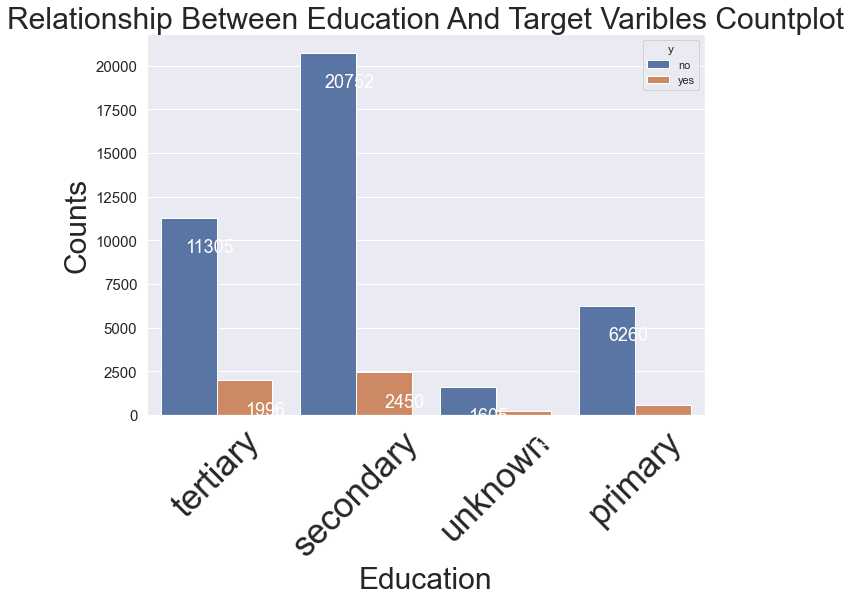

In [23]:
plt.figure(figsize=(10,7))
ax=sns.countplot(x='education',hue="y", data=bank)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='top', color='white', size=18)

plt.title("Relationship Between Education And Target Varibles Countplot",size=30)
plt.xticks(rotation=45,size=35)
plt.xlabel("Education",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=15)
plt.show()


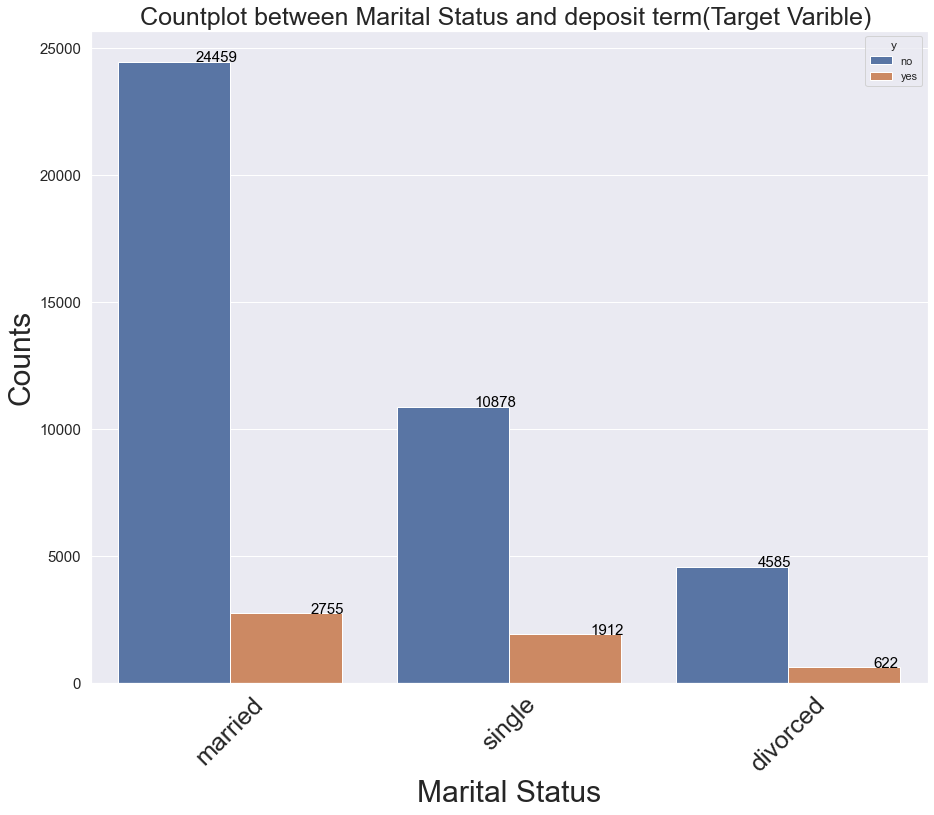

In [24]:
plt.figure(figsize=(15,12))
ax=sns.countplot(x='marital',hue="y", data=bank)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='baseline', color='black', size=15)

plt.title("Countplot between Marital Status and deposit term(Target Varible) ",size=25)
plt.xticks(rotation=45,size=25)
plt.xlabel("Marital Status",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=15)
plt.show()

In [25]:
fig=px.histogram(bank, x="age", color="y")
fig.update_layout(title="Histogram between Age and deposit")
fig.show()


In [26]:
fig=px.histogram(bank, x="balance", color="y")
fig.update_layout(title="Histogram between balance and deposit")
fig.show()

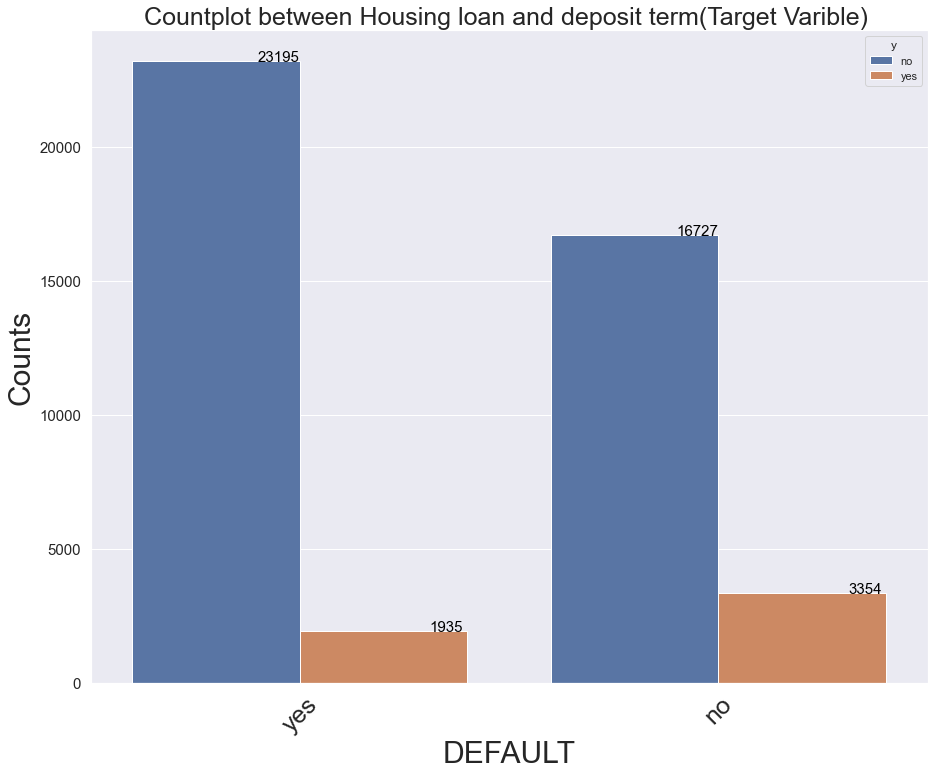

In [27]:
plt.figure(figsize=(15,12))
ax=sns.countplot(x='housing',hue="y", data=bank)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='baseline', color='black', size=15)

plt.title("Countplot between Housing loan and deposit term(Target Varible) ",size=25)
plt.xticks(rotation=45,size=25)
plt.xlabel("DEFAULT",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=15)
plt.show()

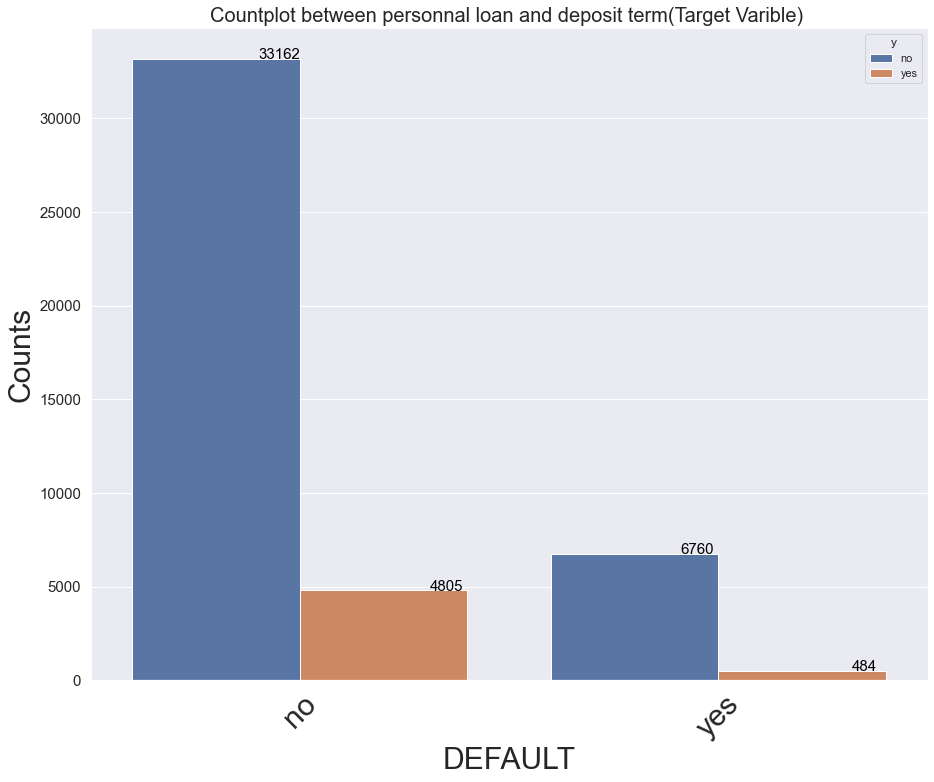

In [28]:
plt.figure(figsize=(15,12))
ax=sns.countplot(x='loan',hue="y", data=bank)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.35, p.get_height()), ha='center', va='baseline', color='black', size=15)

plt.title("Countplot between personnal loan and deposit term(Target Varible) ",size=20)
plt.xticks(rotation=45,size=30)
plt.xlabel("DEFAULT",size=30)
plt.ylabel("Counts",size=30)
plt.yticks(size=15)
plt.show()

<AxesSubplot:xlabel='age', ylabel='balance'>

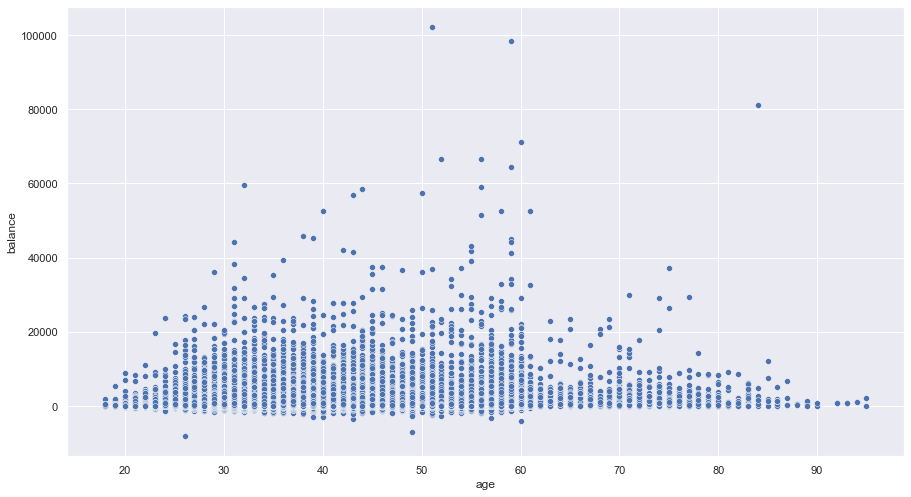

In [29]:
sns.scatterplot(x="age",y="balance",data=bank)

<AxesSubplot:xlabel='y', ylabel='balance'>

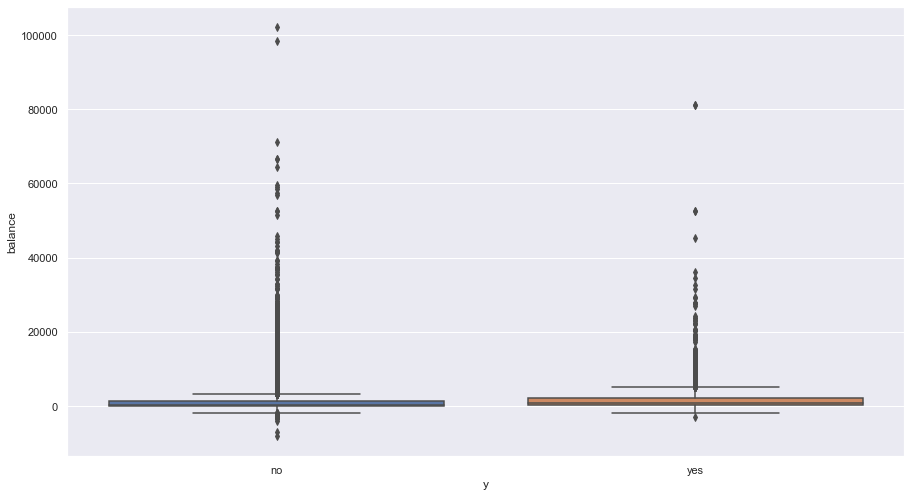

In [30]:
sns.boxplot(y="balance",x="y",data=bank)

In [31]:
fig = px.scatter(bank, x="age", y="balance", color="y", facet_col="y", trendline="ols", title="Bank Dataset")
fig.show()

The age follows same pattern if it with or without deposit term

## CORRELATION
The categorical varible which convert to the numerical value using labelEncoder

In [32]:
# Categorical variables in our data:abs

catFeature = [col for col in bank.columns if pd.api.types.is_string_dtype(bank[col])] # list comprehension
print(catFeature)
labelDict = {}
for col in catFeature:
    labels = bank[col].unique()
    labelDict[col] = labels

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [33]:
bank["y_type"]=bank["y"].apply(lambda x:1 if x=="yes" else 0)
bank["default_type"]=bank["default"].apply(lambda x:1 if x=="yes" else 0)
bank["housing_type"]=bank["housing"].apply(lambda x:1 if x=="yes" else 0)
bank["loan_type"]=bank["loan"].apply(lambda x:1 if x=="yes" else 0)


In [34]:
from sklearn.preprocessing import LabelEncoder

labelJob= LabelEncoder()
bank["job_type"]=labelJob.fit_transform(bank["job"])
bank["month_type"]=labelJob.fit_transform(bank["month"])
bank["marital_type"]=labelJob.fit_transform(bank["marital"])
bank["contact_type"]=labelJob.fit_transform(bank["contact"])
bank["education_type"]=labelJob.fit_transform(bank["education"])
bank["poutcome_type"]=labelJob.fit_transform(bank["poutcome"])



bank


age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day  ... y_type  default_type  housing_type  loan_type  \
0        unknown    5  ...      0             0             1          0   
1        unknown    5  ...      0             0             1          0   
2        unknown    5  ...      0             0             1          1   
3        unknown    5  ...      0             0             1          0   
4        unknown    5  ...      0             0             0          0   
...          ...  ...  ...    ...           ...           ...        ...   
45206   cellular   17  ...      1             0             0          0   
45207   cellular   17  ...      1             0             0          0   
45208   cellular   17  ...      1             0             0          0   
45209  telephone   17  ...      0             0             0          0   
45210   cellular   17  ...      0             0             0          0   

       job_type month_type marital_type  contact_type  education_type  \
0             4          8            1             2               2   
1             9          8            2             2               1   
2             2          8            1             2               1   
3             1          8            1             2               3   
4            11          8            2             2               3   
...         ...        ...          ...           ...             ...   
45206         9          9            1             0               2   
45207         5          9            0             0               0   
45208         5          9            1             0               1   
45209         1          9            1             1               1   
45210         2          9            1             0               1   

       poutcome_type  
0                  3  
1                  3  
2                  3  
3                  3  
4                  3  
...              ...  
45206              3  
45207              3  
45208              2  
45209              3  
45210              1  

[45211 rows x 27 columns]

In [35]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'y_type', 'default_type', 'housing_type',
       'loan_type', 'job_type', 'month_type', 'marital_type', 'contact_type',
       'education_type', 'poutcome_type'],
      dtype='object')

In [36]:
bank_type=bank[['age','balance', 'day', 'duration','previous','pdays', 'job_type', 'default_type',
       'housing_type', 'loan_type', 'month_type', 'marital_type',
       'contact_type', 'education_type', 'poutcome_type','y_type']]

In [37]:
bank_type

age  balance  day  duration  previous  pdays  job_type  default_type  \
0       58     2143    5       261         0     -1         4             0   
1       44       29    5       151         0     -1         9             0   
2       33        2    5        76         0     -1         2             0   
3       47     1506    5        92         0     -1         1             0   
4       33        1    5       198         0     -1        11             0   
...    ...      ...  ...       ...       ...    ...       ...           ...   
45206   51      825   17       977         0     -1         9             0   
45207   71     1729   17       456         0     -1         5             0   
45208   72     5715   17      1127         3    184         5             0   
45209   57      668   17       508         0     -1         1             0   
45210   37     2971   17       361        11    188         2             0   

       housing_type  loan_type  month_type  marital_type  contact_type  \
0                 1          0           8             1             2   
1                 1          0           8             2             2   
2                 1          1           8             1             2   
3                 1          0           8             1             2   
4                 0          0           8             2             2   
...             ...        ...         ...           ...           ...   
45206             0          0           9             1             0   
45207             0          0           9             0             0   
45208             0          0           9             1             0   
45209             0          0           9             1             1   
45210             0          0           9             1             0   

       education_type  poutcome_type  y_type  
0                   2              3       0  
1                   1              3       0  
2                   1              3       0  
3                   3              3       0  
4                   3              3       0  
...               ...            ...     ...  
45206               2              3       1  
45207               0              3       1  
45208               1              2       1  
45209               1              3       0  
45210               1              1       0  

[45211 rows x 16 columns]

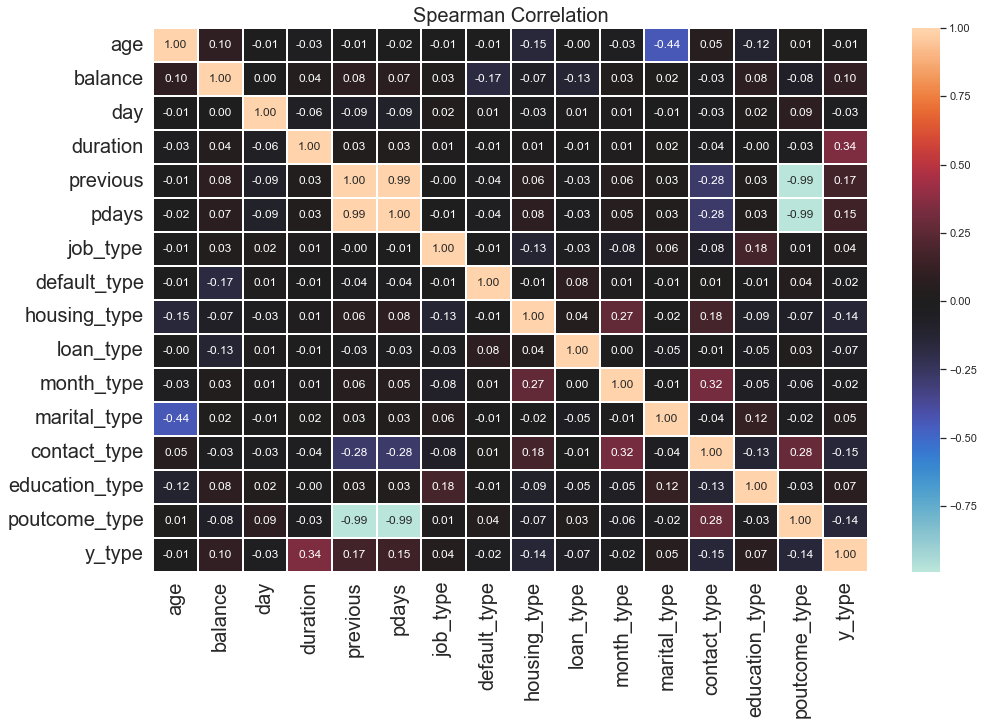

In [38]:
plt.figure(figsize=(16,10))
sns.heatmap(bank_type.corr(method="spearman"), annot = True, fmt=".2f", center= 0,linewidths=.1)

plt.title("Spearman Correlation",size=20)
plt.xticks(rotation=90,size=20)
plt.yticks(size=20)
plt.show()

Duration, Previous, Balance and pdays are positive correlated to deposit, while Credit Default, Personal loan,Housing loan are negative correlated to Deposit.

In [39]:
bank_type.to_csv("nbank.csv")

## DashBoard

In [40]:
custom_tab_selected ={
    "color": "black",
    "box-shadow": "1px 1px 0px white",
    'border-left': '1px solid lightgrey !important',
    'border-right': '1px solid lightgrey !important',
    'border-top': '3px solid #e36209 !important',
}

custom_tab ={
    'color':'#586069',
    'border-top-left-radius': '3px',
    'border-top-right-radius': '3px',
    'border-top': '3px',
    'align-items': 'center',
    'justify-content': "center",
     'font-family': "system-ui",'background-color': '#e36209',
     'border': 'thin lightgrey solid', 
      'overflowX': 'scroll'}


custom_tabs= {
    " width": "85%",
    "border-top-left-radius": "1px",
    "background-color": "#f9f9f9",
    "padding": "0px 24px",
    "border-bottom": "1px solid #d6d6d6"
}

In [41]:
#import the libaries moduled
from jupyter_dash import JupyterDash
import dash
from dash import dcc,html
import dash_bootstrap_components as dbc
from flask import Flask
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go


# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

#init the app
server=Flask(__name__)
app = JupyterDash(__name__,server=server,external_stylesheets=[dbc.themes.BOOTSTRAP,dbc.icons.BOOTSTRAP])

# read the file
# build componebnts
header_comp=html.H1("Marketing campaigns of a Portuguese banking institution Dataset ",style={"color":"#fff","text-align":"center"})
fig1=px.pie(bank,  names="y",
       title='Deposit Term', 
       color_discrete_sequence=px.colors.sequential.RdBu)
fig1.update_layout(template="plotly_dark")

job_grp=bank.groupby(by="job")["y"].count().sort_values(ascending=False).reset_index(name="counts")
fig2 = go.Figure() # Canvass
fig2 = px.bar(job_grp, y='counts', x="job", text='counts', color='job')
fig2.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig2.update_layout(xaxis_tickangle=-45,title="Job category",template="plotly_dark")

edu_grp=bank.groupby(by="education")["y"].count().sort_values(ascending=False).reset_index(name="counts")
fig4 = go.Figure() # Canvass
fig4 = px.bar(edu_grp, y='counts', x="education", text='counts', color='education')
fig4.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig4.update_layout(xaxis_tickangle=-45,template="plotly_dark",title="Education category")

fig5 = px.scatter(bank, x = "age", y = "balance", 
  size = "duration", color = "y", hover_name = "job",
  log_x = True, size_max = 60)
fig5.update_layout(template="plotly_dark",title="Relationship between age ,balance and job")

fig6 = px.histogram(bank, x = "age", y = "duration", color = "loan",
  marginal = "violin", hover_data = bank.columns)
fig6.update_layout(template="plotly_dark",title="Histogram")
  
fig7 = px.imshow(bank.corr(),)
 
#design app layout
app.layout=html.Div([
    dbc.Row(header_comp),
    dbc.Row([
        dbc.Col([
            dcc.Graph(figure=fig1),],style={'width':'30%','float':'left','display':'inline-block'})
            ,dbc.Col([
            dcc.Graph(figure=fig2,)],style={'width':'40%','float':'left','display':'inline-block'})
            ,dbc.Col([
            dcc.Graph(figure=fig4)],style={'width':'30%','float':'right','display':'inline-block'}
            ),
    ],style=custom_tabs
    ),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),html.Br(),
    
    dbc.Row([dbc.Col([
        dcc.Graph(figure=fig5)],style={'width': '30%', 'padding': '0px 20px 20px 20px',"display":"inline-block"}
        ),dbc.Col([
            dcc.Graph(figure=fig6)],style={'width': '30%', 'padding': '0px 20px 20px 20px',"display":"inline-block"}
            ),dbc.Col([
              dcc.Graph(figure=fig7)],style={"width":"30%"})
            ])],style=custom_tab )
    



In [43]:
app.run_server(mode='inline',debug=True, port='8037')